# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [ ]:
# stundent details example: John S. 9812
#                       student details 1: Lin S. 7299
# (if exists)           student details 2: Reut S.  0234

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: Chat GPT
    
Goal: Receive minor technical assistance for specific tasks in the supervised learning assignment, mainly for syntax clarifications and formatting improvements.
    
Propmpt1:"איך מציגים בצורה ברורה טבלה שמשווה את תוצאות המודלים השונים מ-GridSearchCV בעזרת pandas dataframe?"
    
Propmpt2:"איך כותבים description פשוט לגיט (GitHub repository) עבור פרויקט קטן של סיווג יינות, שיכלול הסבר קצר על שלבי העבודה?"

</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>

במטלה זו נבנה מודל למידת מכונה מונחית שמטרתו לסווג סוגי יין לפי תכונות כימיות.  
נבצע את כל שלבי תהליך ה-Supervised Learning:
- טעינת הנתונים
- חקר וניתוח בעזרת ויזואליזציות
- הנדסת תכונות לשיפור הנתונים
- בניית מודלים שונים
- כיוונון פרמטרים באמצעות Cross-Validation
- הערכת ביצועי המודל על סט בדיקה חדש כדי למדוד את רמת הדיוק שלו

</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv('wine_train.csv')
df_test = pd.read_csv('wine_test.csv')

print("The Wine Train Database:")
display(df_train.head())

print("The Wine Test Database:")
display(df_test.head())

The Wine Train Database:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


The Wine Test Database:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


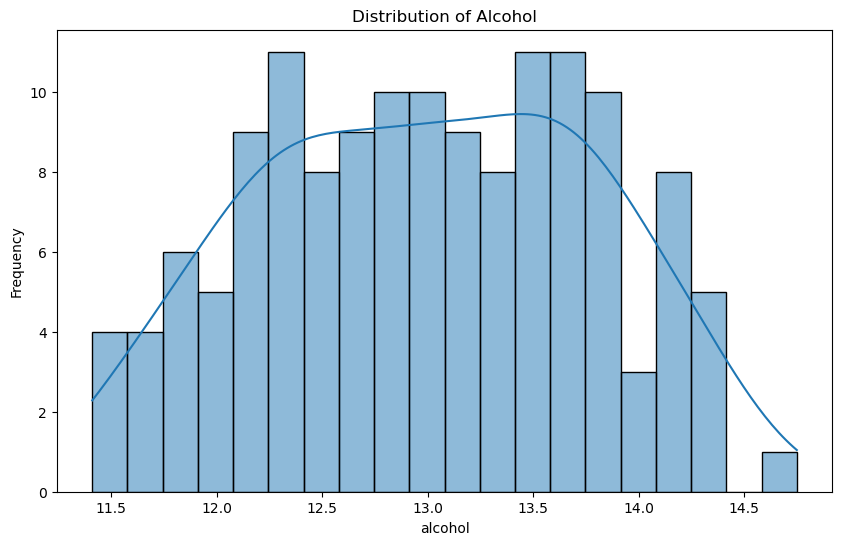

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_train, x='alcohol', kde=True, bins=20)
plt.title('Distribution of Alcohol')
plt.xlabel('alcohol')
plt.ylabel('Frequency')
plt.show()


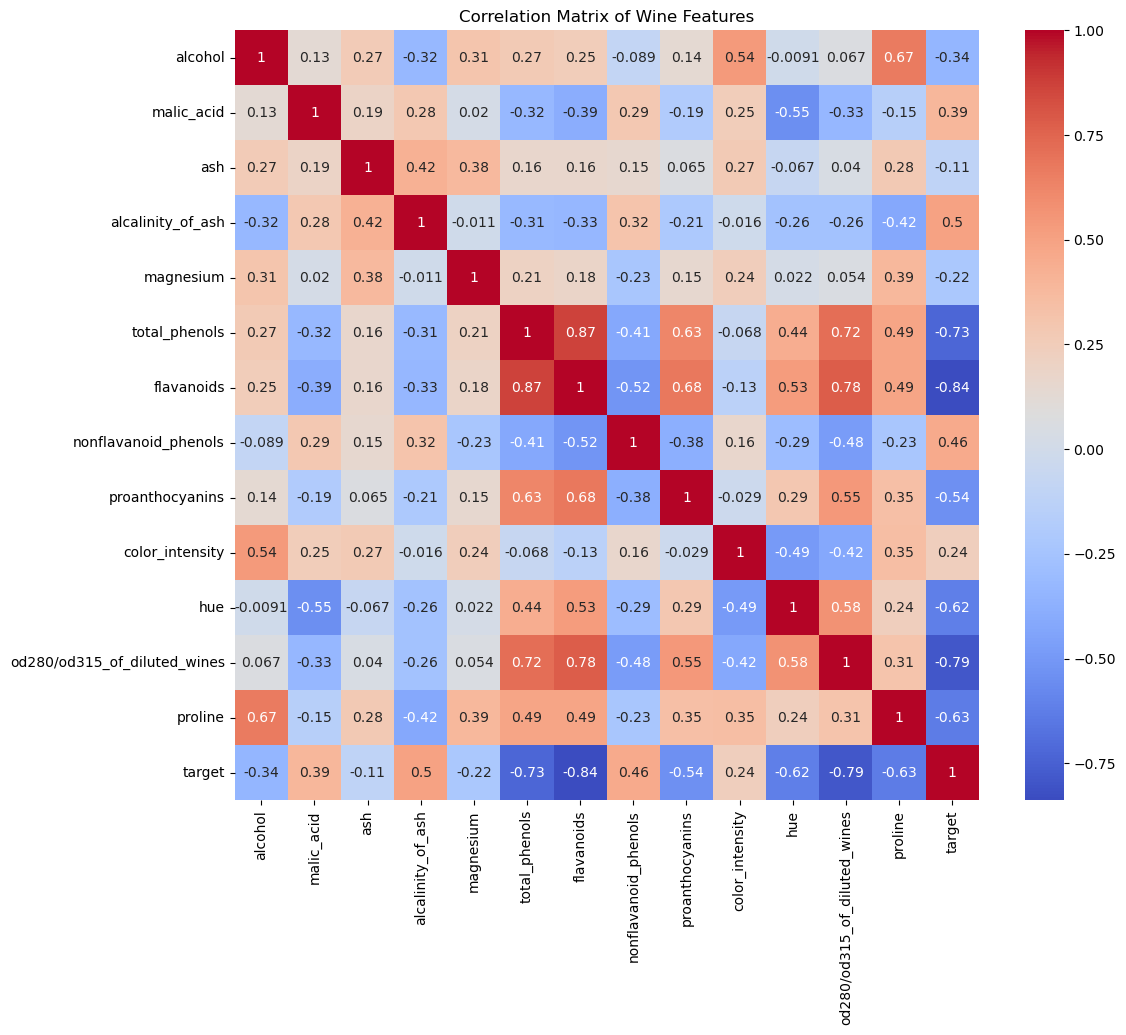

In [33]:
plt.figure(figsize=(12,10))
correlation_matrix = df_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Wine Features')
plt.show()

In [35]:
df_train.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


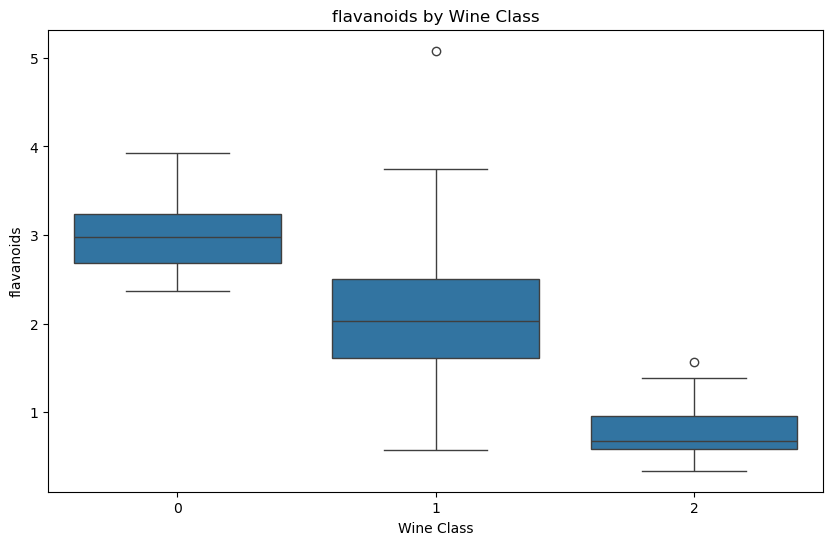

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_train, x='target', y='flavanoids')
plt.title('flavanoids by Wine Class')
plt.xlabel('Wine Class')
plt.ylabel('flavanoids')
plt.show()


## Part 3 - Experiments
You could add as many code cells as needed

In [63]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, make_scorer
from sklearn.ensemble import RandomForestClassifier


X = df_train.drop('target', axis=1)
y = df_train['target']

pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier())
])

param_grid_dt = {
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring=make_scorer(f1_score, average='macro'))
grid_dt.fit(X, y)

print(f"Best Decision Tree params: {grid_dt.best_params_}")
print(f"Best Decision Tree Macro-F1: {grid_dt.best_score_:.3f}")

Best Decision Tree params: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2}
Best Decision Tree Macro-F1: 0.899


In [65]:
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

param_grid_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf']
}

grid_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, scoring=make_scorer(f1_score, average='macro'))
grid_svm.fit(X, y)

print(f"Best SVM params: {grid_svm.best_params_}")
print(f"Best SVM Macro-F1: {grid_svm.best_score_:.3f}")

Best SVM params: {'classifier__C': 0.1, 'classifier__kernel': 'linear'}
Best SVM Macro-F1: 0.979


In [67]:
pipeline_svm_fs = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)),
    ('classifier', SVC())
])

param_grid_svm_fs = {
    'selector__k': [5, 8, 'all'],
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf']
}

grid_svm_fs = GridSearchCV(pipeline_svm_fs, param_grid_svm_fs, cv=5, scoring=make_scorer(f1_score, average='macro'))
grid_svm_fs.fit(X, y)

print(f"Best SVM (with Feature Selection) params: {grid_svm_fs.best_params_}")
print(f"Best SVM (with Feature Selection) Macro-F1: {grid_svm_fs.best_score_:.3f}")

Best SVM (with Feature Selection) params: {'classifier__C': 1, 'classifier__kernel': 'rbf', 'selector__k': 8}
Best SVM (with Feature Selection) Macro-F1: 0.980


In [69]:
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [5, 10, None]
}

grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring=make_scorer(f1_score, average='macro'))
grid_rf.fit(X, y)

print(f"Best RandomForest params: {grid_rf.best_params_}")
print(f"Best RandomForest Macro-F1: {grid_rf.best_score_:.3f}")

Best RandomForest params: {'classifier__max_depth': 5, 'classifier__n_estimators': 100}
Best RandomForest Macro-F1: 0.979


In [70]:
pipeline_svm_mm = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', SVC())
])

param_grid_svm_mm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf']
}

grid_svm_mm = GridSearchCV(pipeline_svm_mm, param_grid_svm_mm, cv=5, scoring=make_scorer(f1_score, average='macro'))
grid_svm_mm.fit(X, y)

print(f"Best SVM (MinMaxScaler) params: {grid_svm_mm.best_params_}")
print(f"Best SVM (MinMaxScaler) Macro-F1: {grid_svm_mm.best_score_:.3f}")

Best SVM (MinMaxScaler) params: {'classifier__C': 0.1, 'classifier__kernel': 'linear'}
Best SVM (MinMaxScaler) Macro-F1: 0.980


In [75]:
results_df = pd.DataFrame({
    'Model': [
        'Decision Tree',
        'SVM (StandardScaler)',
        'SVM (Feature Selection)',
        'SVM (MinMaxScaler)',
        'Random Forest'
    ],
    'Best Macro-F1': [
        grid_dt.best_score_,
        grid_svm.best_score_,
        grid_svm_fs.best_score_,
        grid_svm_mm.best_score_,
        grid_rf.best_score_  
    ],
    'Best Params': [
        grid_dt.best_params_,
        grid_svm.best_params_,
        grid_svm_fs.best_params_,
        grid_svm_mm.best_params_,
        grid_rf.best_params_
    ]
})

display(results_df)

,Model,Best Macro-F1,Best Params
0,Decision Tree,0.898728,"{'classifier__max_depth': 10, 'classifier__min..."
1,SVM (StandardScaler),0.978711,"{'classifier__C': 0.1, 'classifier__kernel': '..."
2,SVM (Feature Selection),0.980247,"{'classifier__C': 1, 'classifier__kernel': 'rb..."
3,SVM (MinMaxScaler),0.979500,"{'classifier__C': 0.1, 'classifier__kernel': '..."
4,Random Forest,0.978968,"{'classifier__max_depth': 5, 'classifier__n_es..."


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [79]:
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif, k=8)),  
    ('classifier', SVC(C=1, kernel='rbf'))  
])

final_pipeline.fit(X, y)

print("Final SVM model with Feature Selection trained on the entire training set.")

Final SVM model with Feature Selection trained on the entire training set.


## Part 5 - Apply on test and show model performance estimation

In [95]:
y_pred = final_pipeline.predict(X)

print("First 5 predictions on test set:")
print(y_pred[:5])

First 5 predictions on test set:
[1 2 1 1 2]


In [97]:
test_macro_f1 = f1_score(y, y_pred, average='macro')
print(f"Test Set Macro-F1 Score: {test_macro_f1:.3f}")

Test Set Macro-F1 Score: 0.993
